In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
stocks = ['INTC','NVDA']

data = pd.DataFrame()
for item in stocks:
    data[item] = wb.DataReader(item, data_source = 'yahoo', start = '2000-1-1')['Adj Close']
    
data

,INTC,NVDA
Date,,
2000-01-03,27.532846,3.587727
2000-01-04,26.247194,3.491927
2000-01-05,26.464764,3.376966
2000-01-06,24.921970,3.156626
2000-01-07,25.950489,3.209315
...,...,...
2020-10-16,54.160000,552.460022
2020-10-19,54.580002,539.909973
2020-10-20,53.430000,545.820007


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5236 entries, 2000-01-03 to 2020-10-22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INTC    5236 non-null   float64
 1   NVDA    5236 non-null   float64
dtypes: float64(2)
memory usage: 122.7 KB


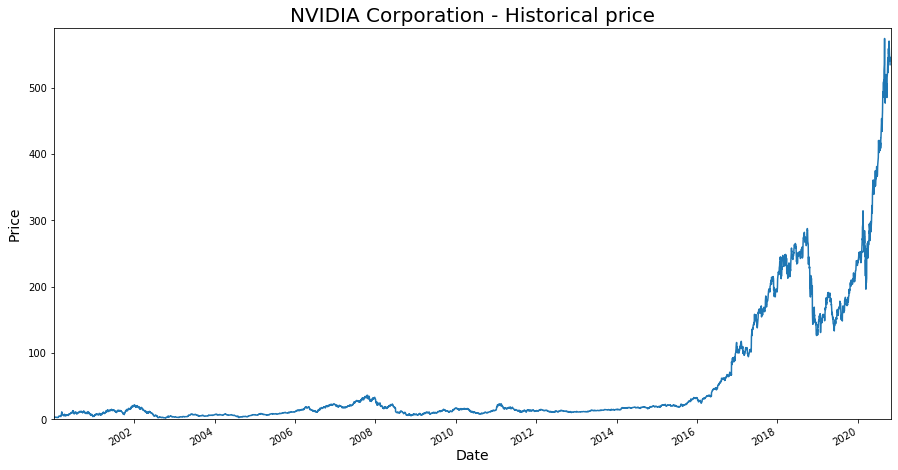

In [4]:
plt.figure(figsize=(15,8))
data['NVDA'].plot(xlim=('2000-01-03','2020-10-31'),ylim=(0,590))
plt.title('NVIDIA Corporation - Historical price',
          fontdict=
          {'fontsize': 20,
           'fontweight' : 5,
           'verticalalignment': 'baseline',
           'horizontalalignment': 'center'}
         )
plt.ylabel('Price', labelpad = 10,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.xlabel('Date', labelpad = 12,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.show()

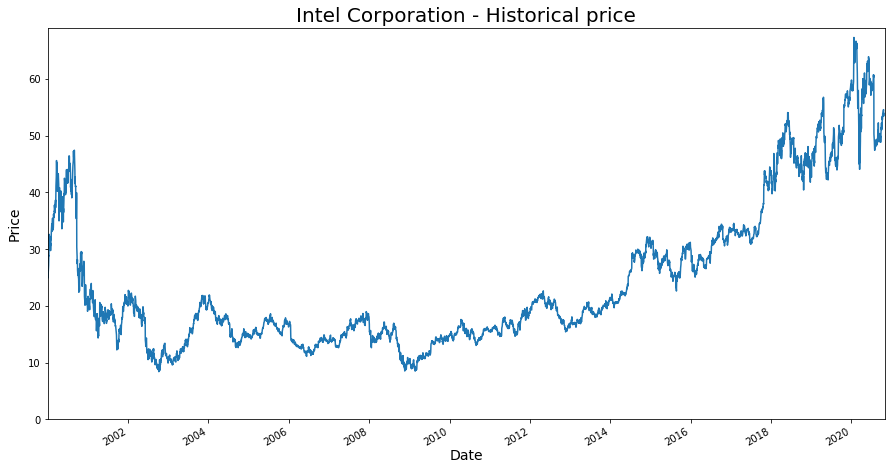

In [5]:
plt.figure(figsize=(15,8))
data['INTC'].plot(xlim=('2000-01-03','2020-10-31'),ylim=(0,69))
plt.title('Intel Corporation - Historical price',
          fontdict=
          {'fontsize': 20,
           'fontweight' : 5,
           'verticalalignment': 'baseline',
           'horizontalalignment': 'center'}
         )
plt.ylabel('Price', labelpad = 10,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.xlabel('Date', labelpad = 12,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.show()

In [6]:
Returns = np.log(data.pct_change()+1)
Returns

,INTC,NVDA
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.047821,-0.027065
2000-01-05,0.008255,-0.033476
2000-01-06,-0.060064,-0.067474
2000-01-07,0.040441,0.016554
...,...,...
2020-10-16,0.005740,-0.011411
2020-10-19,0.007725,-0.022979
2020-10-20,-0.021295,0.010887


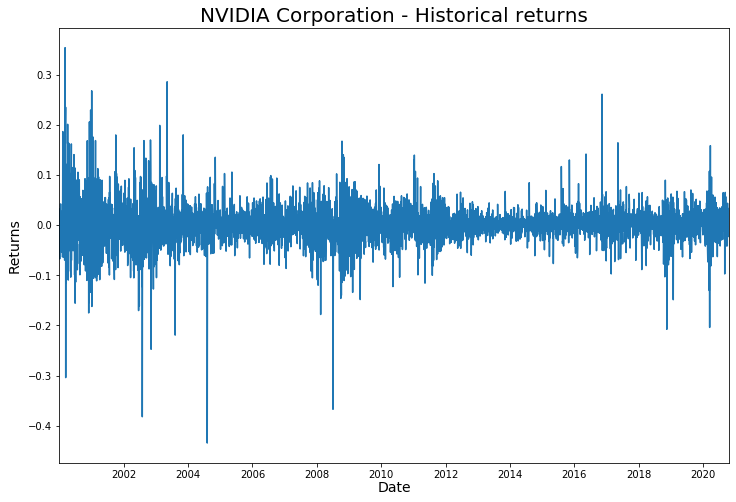

In [7]:
plt.figure(figsize=(12,8))
plt.plot(Returns['NVDA'])
plt.xlim(left = Returns['NVDA'].index[0],right = Returns['NVDA'].index[-1])
plt.title('NVIDIA Corporation - Historical returns',
          fontdict=
          {'fontsize': 20,
           'fontweight' : 5,
           'verticalalignment': 'baseline',
           'horizontalalignment': 'center'}
         )
plt.ylabel('Returns', labelpad = 10,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.xlabel('Date', labelpad = 12,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.show()

# Brownian movement

\begin{equation*}
\large{Price\ today = Price\ yesterday *  e ^ {\mu - \frac{1}{2}\sigma^2 + \sigma * Z(Rand(0;1))}}
\end{equation*} 

In [8]:
NVDA_mu = Returns['NVDA'].mean()
NVDA_mu

0.0009558167336147288

In [9]:
NVDA_var = Returns['NVDA'].var()
NVDA_var

0.0014556314355938075

In [10]:
NVDA_std = Returns['NVDA'].std()
NVDA_std

0.038152738245030425

\begin{equation*}
\large{Drift = \mu - \frac{1}{2}\sigma^2}
\end{equation*} 

In [11]:
NVDA_drift = NVDA_mu - 1/2*NVDA_var
NVDA_drift

0.00022800101581782505

In [12]:
t_interval = 60
iterations_1 = 100

In [13]:
NVDA_daily_returns = np.exp(NVDA_drift + NVDA_std * norm.ppf(np.random.rand(t_interval,iterations_1)))
NVDA_daily_returns

array([[1.00958821, 0.95576015, 0.94301657, ..., 1.03580455, 1.02144129,
        1.00437078],
       [1.00373942, 0.95008618, 1.02402739, ..., 0.9638131 , 0.98350589,
        0.98559484],
       [1.01766946, 0.95050049, 0.97428777, ..., 0.99646968, 1.01295648,
        1.05108718],
       ...,
       [1.02231223, 0.94732977, 0.95188237, ..., 0.9849186 , 0.90575514,
        0.97684361],
       [1.03734088, 1.04250808, 1.0819841 , ..., 1.01108223, 1.06735342,
        0.99009084],
       [1.03965749, 1.03392784, 1.02232878, ..., 0.9869432 , 1.07813677,
        1.03143994]])

In [14]:
NVDA_daily_returns.shape

(60, 100)

In [15]:
NVDA_S0 = data['NVDA'].iloc[-1]
NVDA_S0

534.4400024414062

In [16]:
NVDA_price_list = np.zeros_like(NVDA_daily_returns)
NVDA_price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
NVDA_price_list[0] = NVDA_S0
NVDA_price_list

array([[534.44000244, 534.44000244, 534.44000244, ..., 534.44000244,
        534.44000244, 534.44000244],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [18]:
for t in range(1,t_interval):
    NVDA_price_list[t] = NVDA_price_list[t-1] * NVDA_daily_returns[t]

NVDA_price_list

array([[534.44000244, 534.44000244, 534.44000244, ..., 534.44000244,
        534.44000244, 534.44000244],
       [536.43849571, 507.76405891, 547.28120148, ..., 515.10027589,
        525.62488934, 526.74130629],
       [545.91707236, 482.629985  , 533.20938201, ..., 513.28180882,
        532.43514025, 553.65103383],
       ...,
       [505.23914925, 558.57284239, 454.85225582, ..., 811.49343148,
        467.65451454, 706.10140083],
       [524.10522486, 582.31670417, 492.14290851, ..., 820.48658598,
        499.15264552, 699.10453062],
       [544.88992369, 602.07345497, 503.13185947, ..., 809.77366078,
        538.15482061, 721.08433636]])

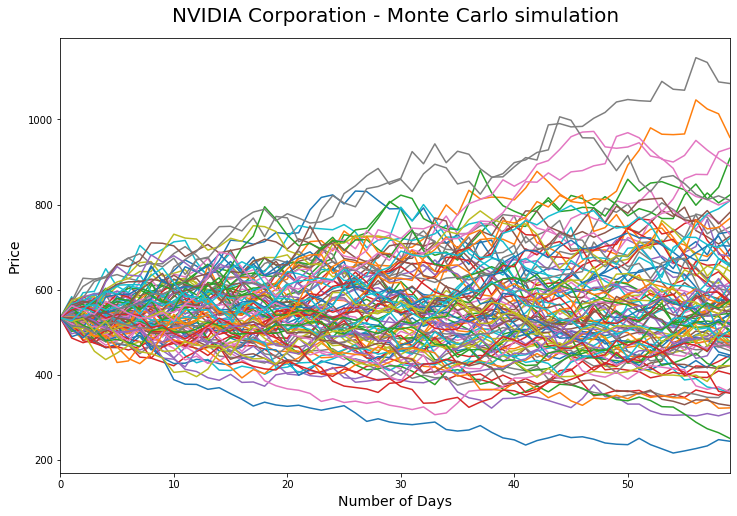

In [19]:
plt.figure(figsize=(12,8))
plt.plot(NVDA_price_list)
plt.xlim(left = 0,right = t_interval-1)
plt.title('NVIDIA Corporation - Monte Carlo simulation',pad = 16,
          fontdict=
          {'fontsize': 20,
           'fontweight' : 5,
           'verticalalignment': 'baseline',
           'horizontalalignment': 'center'}
         )
plt.ylabel('Price', labelpad = 10,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.xlabel('Number of Days', labelpad = 16,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.show()

In [20]:
NVDA_price_list.min(), NVDA_price_list.max()

(216.8651209880838, 1144.6720091287782)

In [21]:
NVDA_pred_price = []

for i in range(1,t_interval):
    NVDA_pred_price.append(NVDA_price_list[i].mean())

NVDA_pred_price

[536.6116391749388,
 534.9615726310798,
 534.9425623173528,
 537.3583734487718,
 540.1718634547423,
 542.7852124964091,
 546.9977719711732,
 547.2827120065203,
 543.2374608328071,
 548.4020272698998,
 548.2847553497319,
 549.3897381124455,
 554.1923397861416,
 551.7120318452224,
 551.3703367474598,
 548.4039188115735,
 553.4142136604481,
 550.9268046178847,
 550.8345549936716,
 551.1312431008683,
 552.9851796478206,
 555.2042753581202,
 558.3983505008863,
 558.9355180735959,
 558.108658187407,
 556.9365640023998,
 555.1855593682562,
 557.5754058640053,
 557.9716636647169,
 560.4129842134029,
 559.8458442159955,
 557.9161020108818,
 559.3229693486593,
 559.5379382977576,
 558.4933178799242,
 560.2812074117819,
 561.0079903072889,
 562.0417163336833,
 565.6078339452444,
 566.4382147752477,
 565.5432174726778,
 566.4623274529504,
 564.4263040664914,
 565.87487843573,
 567.1953475926828,
 566.7640661299256,
 570.1919299913013,
 566.4160911719413,
 567.7458706857719,
 572.1974731652845,
 57

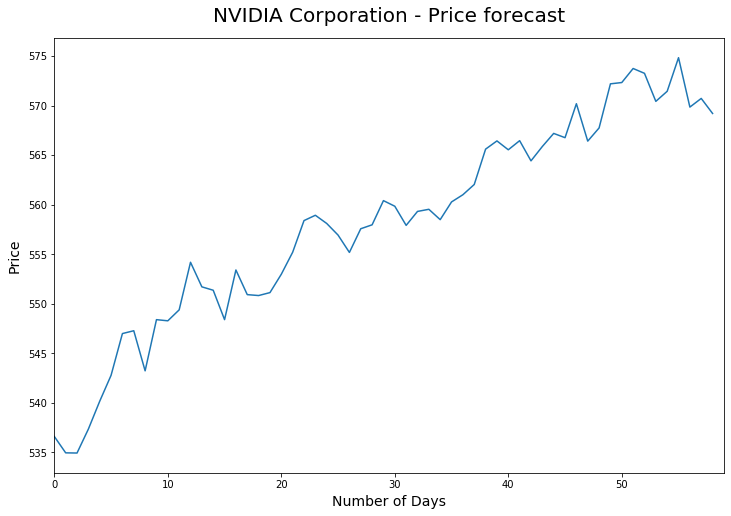

In [22]:
plt.figure(figsize=(12,8))
plt.plot(NVDA_pred_price)
plt.xlim(left = 0,right = t_interval-1)
plt.title('NVIDIA Corporation - Price forecast',pad = 16,
          fontdict=
          {'fontsize': 20,
           'fontweight' : 5,
           'verticalalignment': 'baseline',
           'horizontalalignment': 'center'}
         )
plt.ylabel('Price', labelpad = 10,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.xlabel('Number of Days', labelpad = 16,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.show()

In [23]:
iterations_2 = 500

NVDA_daily_returns_2 = np.exp(NVDA_drift + NVDA_std * norm.ppf(np.random.rand(t_interval,iterations_2)))

NVDA_price_list_2 = np.zeros_like(NVDA_daily_returns_2)
NVDA_price_list_2[0] = NVDA_S0

for t in range(1,t_interval):
    NVDA_price_list_2[t] = NVDA_price_list_2[t-1] * NVDA_daily_returns_2[t]
    
NVDA_pred_price_2 = []

for i in range(1,t_interval):
    NVDA_pred_price_2.append(NVDA_price_list_2[i].mean())

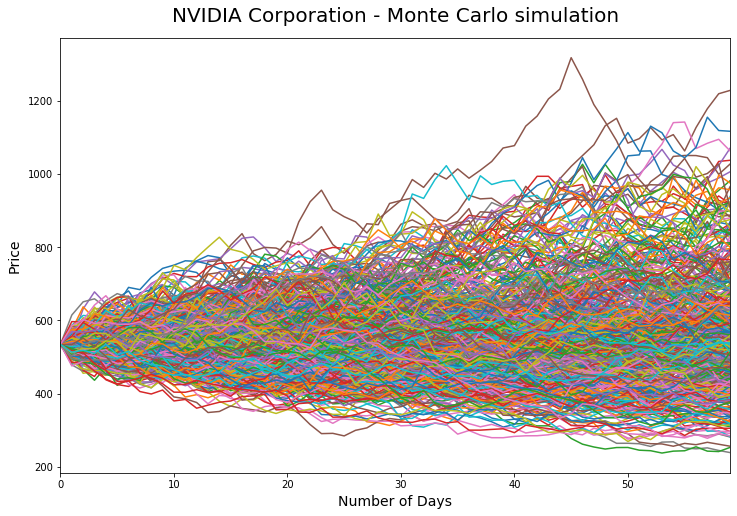

In [24]:
plt.figure(figsize=(12,8))
plt.plot(NVDA_price_list_2)
plt.xlim(left = 0,right = t_interval-1)
plt.title('NVIDIA Corporation - Monte Carlo simulation',pad = 16,
          fontdict=
          {'fontsize': 20,
           'fontweight' : 5,
           'verticalalignment': 'baseline',
           'horizontalalignment': 'center'}
         )
plt.ylabel('Price', labelpad = 10,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.xlabel('Number of Days', labelpad = 16,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.show()

In [26]:
NVDA_price_list_2.min(), NVDA_price_list_2.max()

(237.7054893365794, 1318.2984969985862)

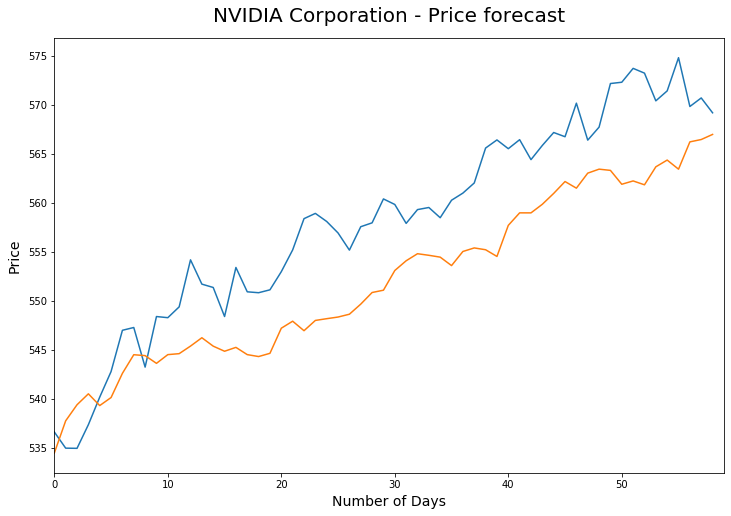

In [27]:
plt.figure(figsize=(12,8))
plt.plot(NVDA_pred_price)
plt.plot(NVDA_pred_price_2)
plt.xlim(left = 0,right = t_interval-1)
plt.title('NVIDIA Corporation - Price forecast',pad = 16,
          fontdict=
          {'fontsize': 20,
           'fontweight' : 5,
           'verticalalignment': 'baseline',
           'horizontalalignment': 'center'}
         )
plt.ylabel('Price', labelpad = 10,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.xlabel('Number of Days', labelpad = 16,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.show()

In [28]:
iterations_3 = 1000

NVDA_daily_returns_3 = np.exp(NVDA_drift + NVDA_std * norm.ppf(np.random.rand(t_interval,iterations_3)))

NVDA_price_list_3 = np.zeros_like(NVDA_daily_returns_3)
NVDA_price_list_3[0] = NVDA_S0

for t in range(1,t_interval):
    NVDA_price_list_3[t] = NVDA_price_list_3[t-1] * NVDA_daily_returns_3[t]
    
NVDA_pred_price_3 = []

for i in range(1,t_interval):
    NVDA_pred_price_3.append(NVDA_price_list_3[i].mean())

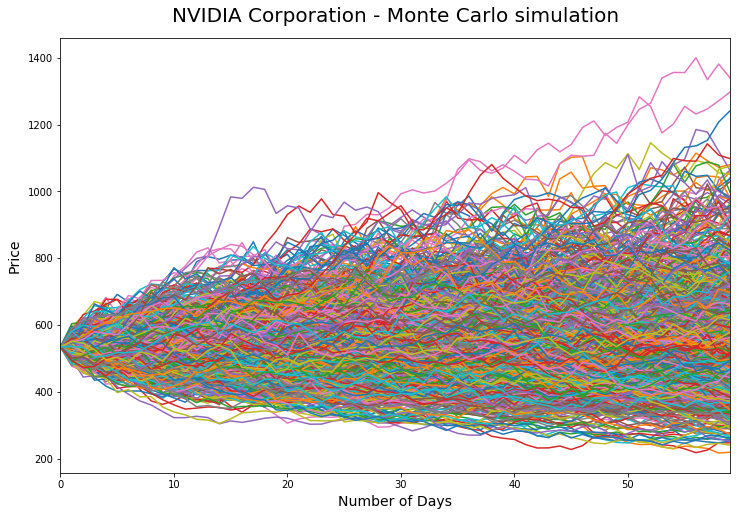

In [29]:
plt.figure(figsize=(12,8))
plt.plot(NVDA_price_list_3)
plt.xlim(left = 0,right = t_interval-1)
plt.title('NVIDIA Corporation - Monte Carlo simulation',pad = 16,
          fontdict=
          {'fontsize': 20,
           'fontweight' : 5,
           'verticalalignment': 'baseline',
           'horizontalalignment': 'center'}
         )
plt.ylabel('Price', labelpad = 10,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.xlabel('Number of Days', labelpad = 16,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.show()

In [30]:
NVDA_price_list_3.min(), NVDA_price_list_3.max()

(216.45419129932176, 1400.286176830827)

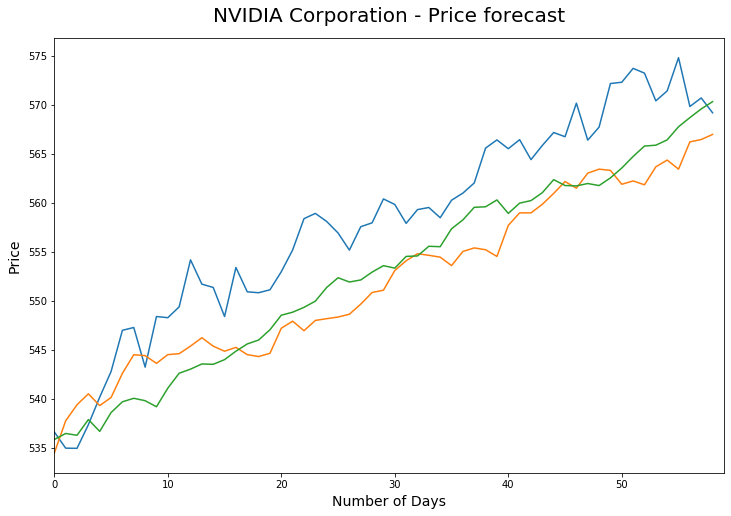

In [31]:
plt.figure(figsize=(12,8))
plt.plot(NVDA_pred_price)
plt.plot(NVDA_pred_price_2)
plt.plot(NVDA_pred_price_3)
plt.xlim(left = 0,right = t_interval-1)
plt.title('NVIDIA Corporation - Price forecast',pad = 16,
          fontdict=
          {'fontsize': 20,
           'fontweight' : 5,
           'verticalalignment': 'baseline',
           'horizontalalignment': 'center'}
         )
plt.ylabel('Price', labelpad = 10,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.xlabel('Number of Days', labelpad = 16,
           fontdict =
           {'fontsize': 14,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'}
          )
plt.show()